### Machine Learning Project 6 - Application of K-means cluster analysis on data about COVID-19 in Indonesia
#### Conte Silvia, Ragone Federica, Scozzari Sara

#### ABSTRACT
The aim of the study is to apply cluster analysis using the k-means algorithm. The dataset contains data about COVID-19 in Indonesia on 19 April 2020 from the Indonesian Task Force.

The dataset has 34 observations (the Indonesian provinces) and 4 variables: the name of the province, the number of confirmed cases, the number of recovered cases, and the number of deaths. Therefore, applying the k-means algorithm, the provinces are grouped according to confirmed, recovered and death cases of COVID-19.

The application of the clustering is an attempt to define the similarity between provinces based on the available data.

The results of this study can be used to implement different policies in provinces from different clusters by the Indonesian government.

#### 1. Data preparation

We import some python libraries: <strong>pandas</strong>, python library for data manipulation and analysis, <strong>warnings</strong>, python library to control the visibility of warnings.

In [1]:
import pandas as pd      
import warnings          
warnings.filterwarnings("ignore")

#### 1A. Upload data

Then, we upload our data using the function <strong> 'read_excel'</strong>, from pandas, to read an Excel file and convert it into a pandas DataFrame.
The parameters of the function are: the path of the dataset and the name of the excel sheet in which the dataset is stored.

The dataset contains for each province: the <strong>name</strong> of the province, the <strong>number of confirmed cases</strong>, the <strong>number of recovered cases</strong> and the <strong>number of deaths</strong>.
The observations are 34 and the variables are 4.

In [2]:
data = pd.read_excel("data_covid_provinsi.xlsx", sheet_name="Sheet1") 
data.head()

Province  Confirmed  Recovered  Deaths
0       DKI Jakarta       3032        234     287
1        Jawa Barat        696         45      59
2        Jawa Timur        590         98      54
3  Sulawesi Selatan        370         43      25
4       Jawa Tengah        349         51      44

#### 1B. Descriptive statistics 

We compute some <strong>descriptive statistics</strong> on the data, using the function describe.

We can say that for the 34 provinces on April 19th: the maximum confirmed cases are 3032, the maximum recovered cases are 234 and the maximum death cases are 287 (all from Jakarta). Then, there is at least one pronvince with 0 recovered and deaths cases.  Next, on average, the confirmed cases are 193, the recovered cases are 20 and the death cases are 17.<p>

In [3]:
stat = data.describe().T[['count','mean', 'min', 'max', 'std']] 
stat.columns = ['Obs','Mean', 'Minimum', 'Maximum', 'Standard Deviation'] 
stat

Obs        Mean  Minimum  Maximum  Standard Deviation
Confirmed  34.0  192.617647      1.0   3032.0          528.469546
Recovered  34.0   20.176471      0.0    234.0           42.856682
Deaths     34.0   17.117647      0.0    287.0           50.128782

In [4]:
stat.to_csv('Descriptive_Statistics.csv', sep=';', decimal=',')

#### 1C. Barplot

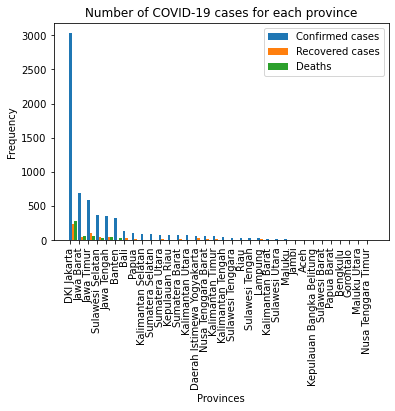

In [5]:
import matplotlib.pyplot as plt   

plt.bar(data.index, data['Confirmed'], width=0.3, label='Confirmed cases')      
plt.bar(data.index+0.3, data['Recovered'], width=0.3, label='Recovered cases')  
plt.bar(data.index+0.6, data['Deaths'], width=0.3, label='Deaths')              
plt.title('Number of COVID-19 cases for each province')
plt.xlabel('Provinces')
plt.ylabel('Frequency')

positions = list(range(0,34))       
labels = data['Province'].tolist()  
plt.xticks(positions, labels, rotation=90)  

plt.legend()
plt.savefig('Barplot.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1D. Delete the province 'DKI Jakarta' from the dataset

When there is a predominant data compared to the others, it is exlcuded from the analysis process.
In our case <strong>Jakarta</strong> has more cases, so it is not included in the clustering process and it will form one special group itself.

Obviusly <strong>Jakarta</strong> was the epicentrum of the pandamic in Indonesia, both because it is the capital of the country and the center of the economy in Indonesia.
    
Therefore, we use the drop function to drop the observation with index 0 (Jakarta) from the dataset.

In [6]:
data_2 = data.drop(0)    
data_2.head()

Province  Confirmed  Recovered  Deaths
1        Jawa Barat        696         45      59
2        Jawa Timur        590         98      54
3  Sulawesi Selatan        370         43      25
4       Jawa Tengah        349         51      44
5            Banten        324          9      34

#### 1E. Missing values are deleted

Missing values have to be deleted from the dataset.<p>
So firstly, we search if there are some missing values in our dataset: there are no missing values, so it is not necessary to use a function to remove them.
    
In case of missing values, we could use the function dropna() to remove all rows that contain at least one missing value.

In [7]:
data_2.isnull()

Province  Confirmed  Recovered  Deaths
1      False      False      False   False
2      False      False      False   False
3      False      False      False   False
4      False      False      False   False
5      False      False      False   False
6      False      False      False   False
7      False      False      False   False
8      False      False      False   False
9      False      False      False   False
10     False      False      False   False
11     False      False      False   False
12     False      False      False   False
13     False      False      False   False
14     False      False      False   False
15     False      False      False   False
16     False      False      False   False
17     False      False      False   False
18     False      False      False   False
19     False      False      False   False
20     False      False      False   False
21     False      False      False   False
22     False      False      False   False
23     False      False      False   False
24     False      False      False   False
25     False      False      False   False
26     False      False      False   False
27     False      False      False   False
28     False      False      False   False
29     False      False      False   False
30     False      False      False   False
31     False      False      False   False
32     False      False      False   False
33     False      False      False   False

#### 1F. Standardization of the dataset 

We want to standardized our dataset in order to make variables comparable.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()  # to create a StandardScaler object
data_scale = scale.fit_transform(data_2[["Confirmed","Recovered","Deaths"]]) 
data_scale = pd.DataFrame(data_scale, columns=[["Confirmed.sd","Recovered.sd","Deaths.sd"]]) 
data_scale.head()

Confirmed.sd Recovered.sd Deaths.sd
0     3.549780     1.547378  3.239203
1     2.911400     4.167286  2.915675
2     1.586460     1.448514  1.039212
3     1.459989     1.843972  2.268619
4     1.309427    -0.232182  1.621562

Since R (the software used for the original project) standardizes the variables by dividing them with the root of their correct variance, we need to correct our standardized values by multiplying them by the root of (n-1)/n.

In [10]:
import math  
data_scale_2 = data_scale * math.sqrt((32/33))
data_scale_2.head()

Confirmed.sd Recovered.sd Deaths.sd
0     3.495582     1.523753  3.189747
1     2.866949     4.103660  2.871158
2     1.562238     1.426398  1.023345
3     1.437698     1.815818  2.233981
4     1.289435    -0.228637  1.596804

In [11]:
data_scale_2.to_csv('Standardized_Dataset.csv', sep=';', decimal=',')

#### 2. Cluster analysis

#### 2A. Clustering distances measurement using Euclidean distances 

We compute the euclidean distance between each pair of observations.

The output of the function 'pdist' is a lower triangular matrix. So, in order to compute the entire matrix of euclidean distances we use the function 'squareform'.

In [12]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [13]:
euclidean_dist = pdist(data_scale_2, 'euclidean')  
square_euclidean_dist = squareform(euclidean_dist)
print(square_euclidean_dist)

[[0.         2.67443426 2.90527    ... 5.98105044 5.9460855  5.99327209]
 [2.67443426 0.         3.5049131  ... 6.83176367 6.76414293 6.84083124]
 [2.90527    3.5049131  0.         ... 3.41028094 3.35140872 3.42163233]
 ...
 [5.98105044 6.83176367 3.41028094 ... 0.         0.09735498 0.01779151]
 [5.9460855  6.76414293 3.35140872 ... 0.09735498 0.         0.09896732]
 [5.99327209 6.84083124 3.42163233 ... 0.01779151 0.09896732 0.        ]]


Then we plot the result using an heatmap.

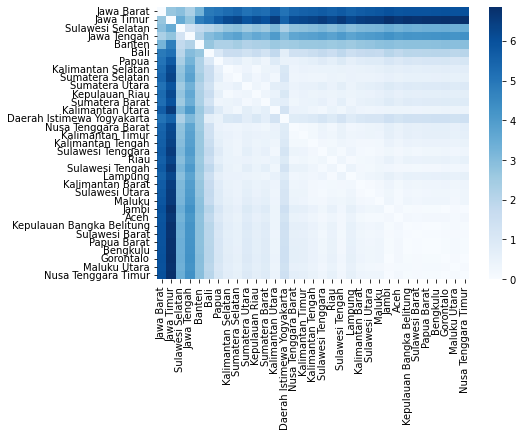

In [14]:
import seaborn as sns

plt.figure(figsize=(7,5))

sns.heatmap(square_euclidean_dist, cmap='Blues', xticklabels=data.loc[1:,'Province'], yticklabels=data.loc[1:,'Province']) 

plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight')
plt.show() # the lighter the color, the closer the observations are to each other

With this plot we can see that, the lighter the color, the closer the observatins are to each other considering the Euclidean distance. The bar in the right shows the color in line with the value of the euclidean distance.

We can see that the first 5 provinces have a darker color, so maybe they will form a cluster together. Same for the others 28.  

#### 2B. Determining the number of cluster (k) using: Elbow method, Silhouette method and Gap statistic method 

Firstly, we determine the optimal number of clusters using three popular techinques: the Elbow method, the Silhouette method and the Gap Statistic method. 
The three methods use the k-means algorithm as a tool to find the optimal number of clusters. 

We know that the k-means algorithm is an unsupervised technique used to group observations into a specific number of clusters (k) such that each cluster contains observations that are similar to one another. 

The algorithm works by first randomly selecting k points from the dataset as the centroids. Then each observation is assigned to the cluster with closest centroid. Next, the centroids are recalculated as the mean of all the observations. These steps are repeated until the cluster assignments no longer change.

In [15]:
import random
random.seed(55)

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  

<strong>Elbow method</strong>

The elbow method is a way to determine the best value of k using k-means by plotting the sum of the squared distances
between each observation and its assigned cluster centroid, (within-cluster sum of squares/wcss or inertia) for each value of k. 

The idea is that as k increases, the inertia will decrease, but at some point, 
the decrement will not be significant enough to justify the increaseament in k. 

The point where the "elbow" of the plot is formed, is the value of k used for the optimal number of clusters.

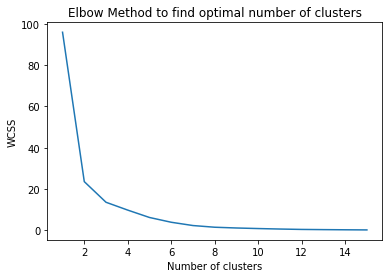

In [17]:
wcss = []   
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=25, random_state=55).fit(data_scale_2) 
    wcss.append(km.inertia_)

plt.plot(range(1, 16), wcss)
plt.title('Elbow Method to find optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_m.png', dpi=300, bbox_inches='tight')
plt.show()

The optimal number of clusters, using the Elbow method, is k=2 

<strong>Silhouette method</strong>

The Silhouette score tells us if individual point are correctly assigned to their clusters.

The Silhouette score is calculated as the difference between the average distance of the observation to all other observations in the same cluster and the average distance of the observation to all observations in the next nearest cluster, divided by the maximum of the two: silhouette=(a-b)/max(a,b).
Values range from -1 to 1, with higher values indicating a better match to the cluster.

To determine the optimal number of clusters, the silhouette method can be used by computing the silhouette value for each observation in the dataset for different numbers of clusters, and selecting the number of clusters that results in the highest average silhouette value across all observations.

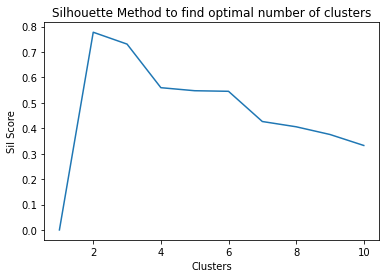

In [18]:
scores = [0]   

for i in range(2,11):
    labels = KMeans(n_clusters=i, init="k-means++", random_state=55, max_iter=100, n_init=25).fit(data_scale_2).labels_  
    scores.append(silhouette_score(data_scale_2, labels, metric="euclidean", sample_size=33, random_state=55))
    
scores1 = pd.DataFrame({'Clusters' : range(1,11), 'Sil Score' : scores}) 
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = scores1)            
plt.title('Silhouette Method to find optimal number of clusters')
plt.savefig('silh_m.png', dpi=300, bbox_inches='tight')
plt.show();

The optimal number of clusters, using the Silhouette method, is k=2 

<strong>Gap statistic method</strong>

The Gap Statistic method compares the difference between the within-cluster dispersion for different values of k (number of clusters) to a null reference distribution of the data. 

A null reference distribution represents the expected within-cluster dispersion if the data points were randomly assigned to clusters.

The optimal number of clusters is chosen as the value of k that maximizes the gap statistic. This means that the clustering structure is far away from the random uniform distribution.

In [19]:
#!pip install gap-stat
from gap_statistic import OptimalK      
optimalK = OptimalK(parallel_backend='None')

Optimal number of clusters:  2
    n_clusters  gap_value
0          1.0   0.383758
1          2.0   1.354725
2          3.0   1.200811
3          4.0   1.145828
4          5.0   0.830207
5          6.0   1.075456
6          7.0   0.584064
7          8.0   0.487991
8          9.0   0.741471
9         10.0   0.112058
10        11.0   0.162023
11        12.0   0.757091
12        13.0  -0.206226
13        14.0   0.497517
14        15.0   0.853703


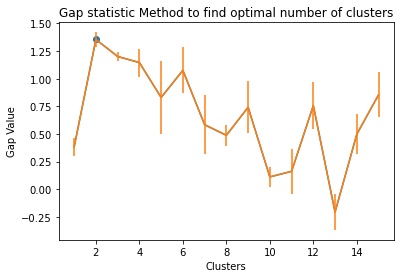

In [38]:
opt_clus = optimalK(data_scale_2, cluster_array=np.arange(1, 16))  
print('Optimal number of clusters: ', opt_clus)
print(optimalK.gap_df.iloc[:,[0,1]])

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == opt_clus].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == opt_clus].gap_value)   
plt.errorbar(range(1,16), optimalK.gap_df.gap_value, optimalK.gap_df.sk)

plt.xlabel('Clusters')
plt.ylabel('Gap Value')
plt.title('Gap statistic Method to find optimal number of clusters')
plt.show()

#### 2C. Representation of the clusters 

Based on the results of the three methods, we can say that the optimal number of clusters is k=2.

In this way, one cluster is made up of 5 provinces and the other one of 28. 

In [21]:
labels = KMeans(n_clusters=2).fit(data_scale_2).labels_
df = pd.DataFrame({'Provinces': data.loc[1:, 'Province'], 'Cluster': labels+1})
df

Provinces  Cluster
1                   Jawa Barat        2
2                   Jawa Timur        2
3             Sulawesi Selatan        2
4                  Jawa Tengah        2
5                       Banten        2
6                         Bali        1
7                        Papua        1
8           Kalimantan Selatan        1
9             Sumatera Selatan        1
10              Sumatera Utara        1
11              Kepulauan Riau        1
12              Sumatera Barat        1
13            Kalimantan Utara        1
14  Daerah Istimewa Yogyakarta        1
15         Nusa Tenggara Barat        1
16            Kalimantan Timur        1
17           Kalimantan Tengah        1
18           Sulawesi Tenggara        1
19                        Riau        1
20             Sulawesi Tengah        1
21                     Lampung        1
22            Kalimantan Barat        1
23              Sulawesi Utara        1
24                      Maluku        1
25                       Jambi        1
26                        Aceh        1
27   Kepulauan Bangka Belitung        1
28              Sulawesi Barat        1
29                 Papua Barat        1
30                    Bengkulu        1
31                   Gorontalo        1
32                Maluku Utara        1
33         Nusa Tenggara Timur        1

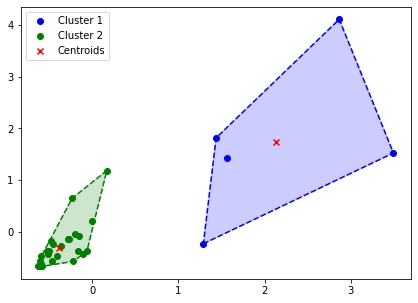

In [22]:
from scipy.spatial import ConvexHull

X = np.array(data_scale_2)   
km = KMeans(n_clusters=2, init="k-means++", random_state=55, max_iter=100, n_init=25).fit(data_scale_2)
labels = km.labels_                 
ncluster = km.n_clusters             
centroids = km.cluster_centers_      

def drawclusters(ax):          
    for i in range(ncluster):  
        points = X[labels == i]  
        ax.scatter(x=points[:, 0], y=points[:, 1], c=col[i], label=f'Cluster {i + 1}') 
        hull = ConvexHull(points[:, [0,1]])                  
        vert = np.append(hull.vertices, hull.vertices[0])    
        ax.plot(points[vert, 0], points[vert, 1], '--', c=col[i])      
        ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2) 
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='x') 
    
col = ['blue', 'green']       
fig, ax = plt.subplots(1, figsize=(7, 5))  
drawclusters(ax)              
ax.legend()                   
plt.savefig('Clust_2.png', dpi=300, bbox_inches='tight')
plt.show()

<strong>Cluster 1</strong> (Jawa Barat, Jawa Timur, Sulawesi Selatan, Jawa Tengah, Banten)

<strong>Cluster 2</strong> (Bali, Papua, Kalimantan Selatan, Sumatera Selatan, Sumatera Utara, Kepulauan Riau, Sumatera Barat, Kalimantan Utara, Daerah Istimewa Yogyakarta, Nusa Tenggara Barat, Kalimantan Timur, Kalimantan Tengah, Sulawesi Tenggara, Riau, Sulawesi Tengah, Lampung, Kalimantan Barat, Sulawesi Utara, Maluku, Jambi, Aceh, Kepulauan Bangka Belitung, Sulawesi Barat, Papua Barat, Bengkulu, Gorontalo, Maluku Utara, Nusa Tenggara Timur)

#### 3. Cluster Analysis with 'DKI Jakarta' 

Going back to the dataset with all the observations, we want to reproduce the analysis including the Jakarta observation.  

In [23]:
data.head()

Province  Confirmed  Recovered  Deaths
0       DKI Jakarta       3032        234     287
1        Jawa Barat        696         45      59
2        Jawa Timur        590         98      54
3  Sulawesi Selatan        370         43      25
4       Jawa Tengah        349         51      44

In [24]:
scale = StandardScaler()
data_scale_j = scale.fit_transform(data[["Confirmed","Recovered","Deaths"]])  
data_scale_j = pd.DataFrame(data_scale_j, columns=[["Confirmed.sd","Recovered.sd","Deaths.sd"]])  

data_scale_j_2 = data_scale_j * math.sqrt((33/34))  
data_scale_j_2.head()

Confirmed.sd Recovered.sd Deaths.sd
0     5.372840     4.989269  5.383780
1     0.952529     0.579222  0.835495
2     0.751949     1.815902  0.735752
3     0.335653     0.532555  0.157242
4     0.295916     0.719223  0.536266

In [25]:
data_scale_j_2.to_csv('Standardized_Dataset_J.csv', sep=';', index=True, decimal=',')

Using the Elbow method, we determine the optimal number of clusters.

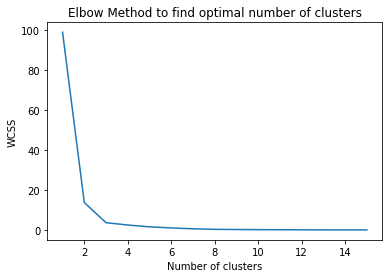

In [26]:
wcss = []          
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=25, random_state=55).fit(data_scale_j_2) 
    wcss.append(km.inertia_)

plt.plot(range(1, 16), wcss)
plt.title('Elbow Method to find optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_m_2.png', dpi=300, bbox_inches='tight')
plt.show()

Now, the optimal number of clusters seems to be 2 or 3; we try with k=3.

As we can see, when k=3, Jakarta forms one cluster, another cluster has 4 provinces and the last cluster has 29 provinces. 

In [27]:
labels = KMeans(n_clusters=3).fit(data_scale_j_2).labels_
df = pd.DataFrame({'Provinces': data['Province'], 'Cluster': labels+1})
df

Provinces  Cluster
0                  DKI Jakarta        2
1                   Jawa Barat        3
2                   Jawa Timur        3
3             Sulawesi Selatan        3
4                  Jawa Tengah        3
5                       Banten        1
6                         Bali        1
7                        Papua        1
8           Kalimantan Selatan        1
9             Sumatera Selatan        1
10              Sumatera Utara        1
11              Kepulauan Riau        1
12              Sumatera Barat        1
13            Kalimantan Utara        1
14  Daerah Istimewa Yogyakarta        1
15         Nusa Tenggara Barat        1
16            Kalimantan Timur        1
17           Kalimantan Tengah        1
18           Sulawesi Tenggara        1
19                        Riau        1
20             Sulawesi Tengah        1
21                     Lampung        1
22            Kalimantan Barat        1
23              Sulawesi Utara        1
24                      Maluku        1
25                       Jambi        1
26                        Aceh        1
27   Kepulauan Bangka Belitung        1
28              Sulawesi Barat        1
29                 Papua Barat        1
30                    Bengkulu        1
31                   Gorontalo        1
32                Maluku Utara        1
33         Nusa Tenggara Timur        1

In [28]:
df.to_csv('Provinces_Clusters.csv', sep=';', index=True, decimal=',')

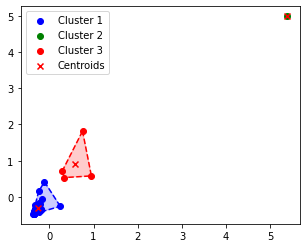

In [39]:
X = np.array(data_scale_j_2)   
km = KMeans(n_clusters=3, init="k-means++", random_state=55, max_iter=100, n_init=25).fit(data_scale_j_2)
labels = km.labels_                  
ncluster = km.n_clusters             
centroids = km.cluster_centers_      

def drawclusters(ax):
    for i in range(ncluster):
        points = X[labels == i]
        if(len(points)>=3):  
          ax.scatter(points[:, 0], points[:, 1], c=col[i], label=f'Cluster {i + 1}') 
          hull = ConvexHull(points[:, [0,1]])                
          vert = np.append(hull.vertices, hull.vertices[0])  
          ax.plot(points[vert, 0], points[vert, 1], '--', c=col[i])           
          ax.fill(points[vert, 0], points[vert, 1], c=col[i], alpha=0.2)       
        else:
          ax.scatter(points[:,0], points[:,1], c=col[i], label=f'Cluster {i + 1}')  
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='x')

col = ['blue', 'green', 'red']
fig, ax = plt.subplots(1, figsize=(5, 4))
drawclusters(ax)
ax.legend()
plt.savefig('Clust_3.png', dpi=300, bbox_inches='tight')
plt.show()

<strong>Cluster 1</strong> (Jawa Barat, Jawa Timur, Sulawesi Selatan, Jawa Tengah)

<strong>Cluster 2</strong> (Banten, Bali, Papua, Kalimantan Selatan, Sumatera Selatan, Sumatera Utara, Kepulauan Riau, Sumatera Barat, Kalimantan Utara, Daerah Istimewa Yogyakarta, Nusa Tenggara Barat, Kalimantan Timur, Kalimantan Tengah, Sulawesi Tenggara, Riau, Sulawesi Tengah, Lampung, Kalimantan Barat, Sulawesi Utara, Maluku, Jambi, Aceh, Kepulauan Bangka Belitung, Sulawesi Barat, Papua Barat, Bengkulu, Gorontalo, Maluku Utara, Nusa Tenggara Timur)

<strong>Cluster 3</strong> (DKI Jakarta)




#### CONLCUSION

Provincial clustering based on the COVID-19 cases in Indonesia is an attempt to determine the similarity between provinces based on confirmed cases, recovered cases, and death cases. 

Based on the results of this study, there are 3 clusters: 

<strong>Cluster 1</strong> (Jawa Barat, Jawa Timur, Sulawesi Selatan, Jawa Tengah)

<strong>Cluster 2</strong> (Banten, Bali, Papua, Kalimantan Selatan, Sumatera Selatan, Sumatera Utara, Kepulauan Riau, Sumatera Barat, Kalimantan Utara, Daerah Istimewa Yogyakarta, Nusa Tenggara Barat, Kalimantan Timur, Kalimantan Tengah, Sulawesi Tenggara, Riau, Sulawesi Tengah, Lampung, Kalimantan Barat, Sulawesi Utara, Maluku, Jambi, Aceh, Kepulauan Bangka Belitung, Sulawesi Barat, Papua Barat, Bengkulu, Gorontalo, Maluku Utara, Nusa Tenggara Timur)

<strong>Cluster 3</strong> (DKI Jakarta). 

The results of the provincial clustering are expected to provide input to the government for making policies related to restrictions on community activities or other policies for overcoming the spread of COVID-19.

:)